<a href="https://colab.research.google.com/github/Justinr2940/Summer-Micro-Credential/blob/main/Titanic_logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Identify the problem

The aim for this analysis is to project the classification of the survived vs not survived in the titanic

#Task 2: Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly
import cufflinks as cf
cf.go_offline()

#Task 3: Load the Data

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/Justinr2940/Machine-learning-Data/main/titanic_train.csv")

#Task 4: EDA (Exploratory Datat Analysis)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
train.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64

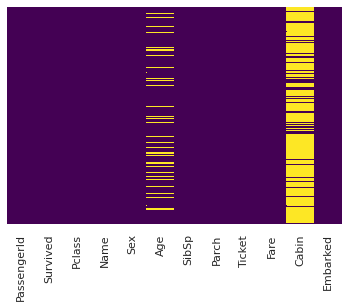

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap='viridis')

In [12]:
def input_age(cols):
  #Defining function to do
  Age = cols[0]

  Pclass = cols[1]

  if(pd.isnull(Age)):
    if Pclass == 1:

      return 37

    elif Pclass == 2:

      return 29
    
    else: 
      return 24
    
  else:
    return Age



In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(input_age, axis = 1)


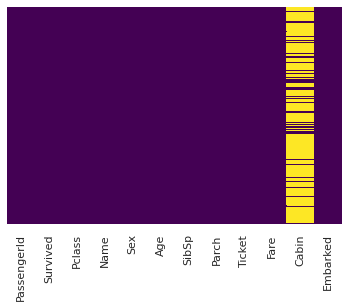

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap='viridis')

In [17]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
train.drop('Cabin', axis = 1, inplace = True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


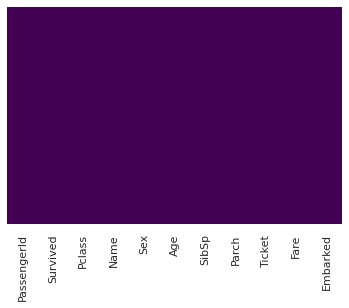

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap='viridis')

In [21]:
train.dropna(inplace = True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first=(True))

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
train.drop(['Sex', 'Embarked', 'Name', "Ticket"], axis = 1, inplace = True)

In [30]:
train = pd.concat([train, sex, embark], axis = 1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#Task 5: Data visualizations

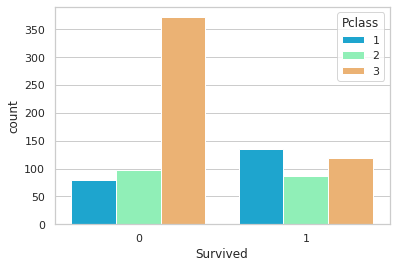

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = "Survived", hue='Pclass', data = train, palette = "rainbow")

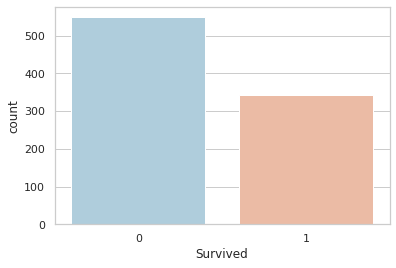

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = "Survived", data = train, palette = "RdBu_r")

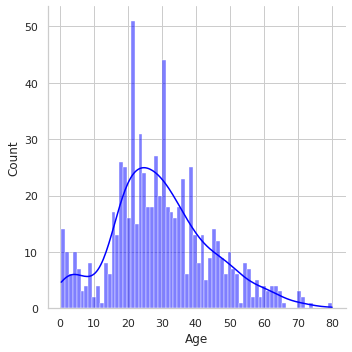

In [9]:
sns.displot(train['Age'].dropna(), kde= True, color = 'blue', bins = 70)

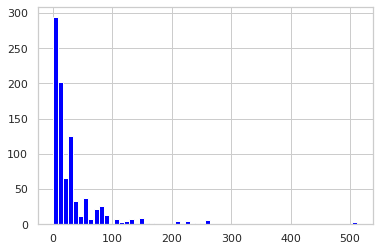

In [10]:
train['Fare'].hist(color = 'blue', bins=60, )

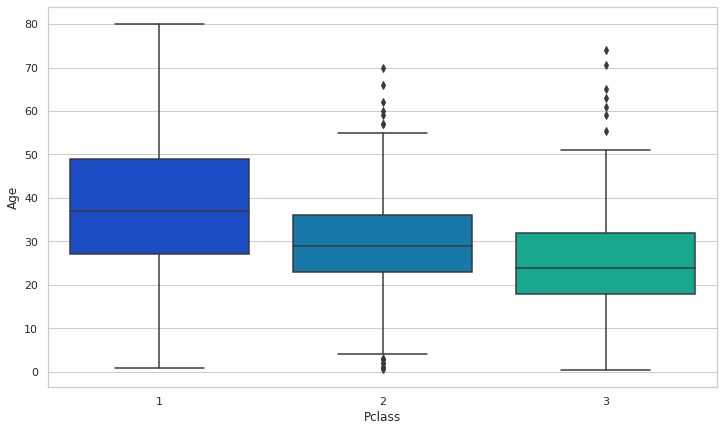

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

Since we can determine that in higher classes tend to be older we can then use these to average age values and input according to Pclass for age

#Task 6: Compute the Cost Function

#Task 7: Compute the Gradient Descent

#Task 8: Visualizing the Cost Function

#Task 8.5 perforrm train split test

In [32]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.25, random_state = 42)

#Task 9: Conduct The Linear Regression of the Data

###Import the adequate model

In [34]:
from sklearn.linear_model import LogisticRegression

###Create the model by assigning a variable the class pertaining to the model selected

In [45]:
logmodel = LogisticRegression()

###Train the model created by using the fit method

In [46]:
logmodel.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

###Evaluate the model

In [40]:
from sklearn.metrics import classification_report

In [47]:
predictions = logmodel.predict(x_test)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.70      0.71        82

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



#Task 10: Making Predictions

In [49]:
print(logmodel.score(x_test, y_test))
pp = logmodel.predict(x_test)
print('Survived: ', sum(pp!=0))
print('Not Survived: ', sum(pp==0))

0.7937219730941704
Survived:  78
Not Survived:  145
